# Import Package

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

import warnings
warnings.filterwarnings('ignore')

# Load Data & Descriptive Statistic

In [11]:
df=pd.read_csv('housing.csv')



Columns:

    CRIM    : Per capita crime rate by town
    ZN      : Proportion of residential land zoned for lots over 25,000 sq. ft
    INDUS   : Proportion of non-retail business acres per town
    CHAS    : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX     : Nitric oxide concentration (parts per 10 million)
    RM      : Average number of rooms per dwelling
    AGE     : Proportion of owner-occupied units built prior to 1940
    DIS     : Weighted distances to five Boston employment centers
    RAD     : Index of accessibility to radial highways
    PTRATIO : Pupil-teacher ratio by town
    B       : 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
    LSTAT   : Percentage of lower status of the population
    MEDV    : Median value of owner-occupied homes in $1000s



## Descriptive Statistics

In [12]:
def describe (df) :
    print('Total Row', df.shape[0],',Total Feature', df.shape[1],'\n')
    print(df.info())
    return(df.head(5).style)
describe(df)

Total Row 506 ,Total Feature 14 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,6.062200,3,222,18.700000,396.900000,5.330000,36.200000


In [13]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [14]:
df[df.LSTAT<2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
161,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0


# EDA & Data Cleansing

# Mising Values

In [15]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There is not any missing values from our data

## Duplicated Data

In [16]:
df.duplicated().sum()

0

There is not any Duplicated data from our data

# EDA

Define some functions used for EDA

In [17]:

def box_hist_plot(df,column):
  '''
  Function for boxplot and histogram in 1 figure
  '''
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  df[[column]].boxplot()

  plt.subplot(1, 2, 2)
  df[column].hist()

def distribution_plot(df, size = (15, 30),kde=True):
  '''
  Function for distplot entire numerical value
  '''
  plt.figure(figsize = size )
  for i, x in enumerate(df):
      plt.subplot(6, 3,i+1)
      sns.distplot(x=df[x], color='blue',kde=kde).set(title=x)
      plt.xticks(rotation = 20)
  plt.tight_layout()

def corr_scatterplot(df,target, size = (15, 30)):
  '''
  Function for scatterplot entire numerical value
  '''
  plt.figure(figsize = size )
  for i, x in enumerate(df):
      plt.subplot(6, 3,i+1)
      sns.scatterplot(data=df,y=target,x=x, color='navy').set(title='R: {:.4f}'.format(df[[target,x]].corr().iloc[0, 1]))
      plt.xticks(rotation = 20)
  plt.tight_layout()

def outlier_plot(df):
  '''
  Function for boxplot entire numerical value
  '''
  plt.figure(figsize = (15, 20))
  for i, x in enumerate(df):
      plt.subplot(6, 3,i+1)
      sns.boxplot(x, data = df, color='skyblue',width=0.3)
      plt.xticks(rotation = 20)
  plt.tight_layout()

def detect_outlier(df,column,thres=1.5,plot=False):
  '''
  Function to detect outlier
  '''
  IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
  upper_fence = df[column].quantile(0.75) + (IQR * thres)
  lower_fence = df[column].quantile(0.25)  - (IQR * thres)
  
  print('Upper Fence: {}\n'.format(upper_fence))
  print('Lower Fence: {}\n'.format(lower_fence))
  print('Proportion of Upper Outliers: {}\n'.format(len(df[df[column]>upper_fence])/len(df)*100))
  print('Proportion of Lower Outliers: {}\n'.format(len(df[df[column]<lower_fence])/len(df)*100))
  
  if plot==True:
    box_hist_plot(df,column)

def correlated(df,tolerance):
  '''
  Function to know correlated variables
  Input: {dataframe, correlation_tolerance}
  '''
  cate_features_index = np.where(df.dtypes == 'O')[0]
  num_features_index = [x for x in range(len(df.columns)) if x not in cate_features_index]
  
  #Check correlation of numerical variables
  corrmat = df.iloc[:,num_features_index].corr()
  corrmat = corrmat.abs().unstack() # absolute value of corr coef
  corrmat = corrmat.sort_values(ascending=False)
  corrmat = corrmat[corrmat >= tolerance]
  corrmat = corrmat[corrmat < 1]
  corrmat = pd.DataFrame(corrmat).reset_index()
  corrmat.columns = ['feature1', 'feature2', 'corr']

  # find groups of correlated features

  grouped_feature_ls = []
  correlated_groups = []

  for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:
      # find all features correlated to a single feature
      correlated_block = corrmat[corrmat.feature1 == feature]
      grouped_feature_ls = grouped_feature_ls + list(
      correlated_block.feature2.unique()) + [feature]

      # append the block of features to the list
      correlated_groups.append(correlated_block)

  print('found {} correlated groups'.format(len(correlated_groups)))
  print('out of {} total features'.format(df.iloc[:,num_features_index].shape[1]))

  for group in correlated_groups:
    print(group)
    print()

def cek_multicollinearity(df,plot=False,thres=0):
  '''
  Function for cek multicollinearity in data frame
  '''
  X = add_constant(df)
  vif_df = pd.DataFrame([vif(X.values, i) 
                for i in range(X.shape[1])], 
                index=X.columns).reset_index()
  vif_df.columns = ['feature','vif_score']
  vif_df = vif_df.loc[vif_df.feature!='const']
  if (plot==True) :
    print(vif_df)
    corr=df.corr()
    corr=corr[(corr>=thres) | (corr<=-thres)]
    plt.figure(figsize=(10,7))
    sns.heatmap(corr,annot=True,fmt='.2f')
  else :
    return(vif_df)


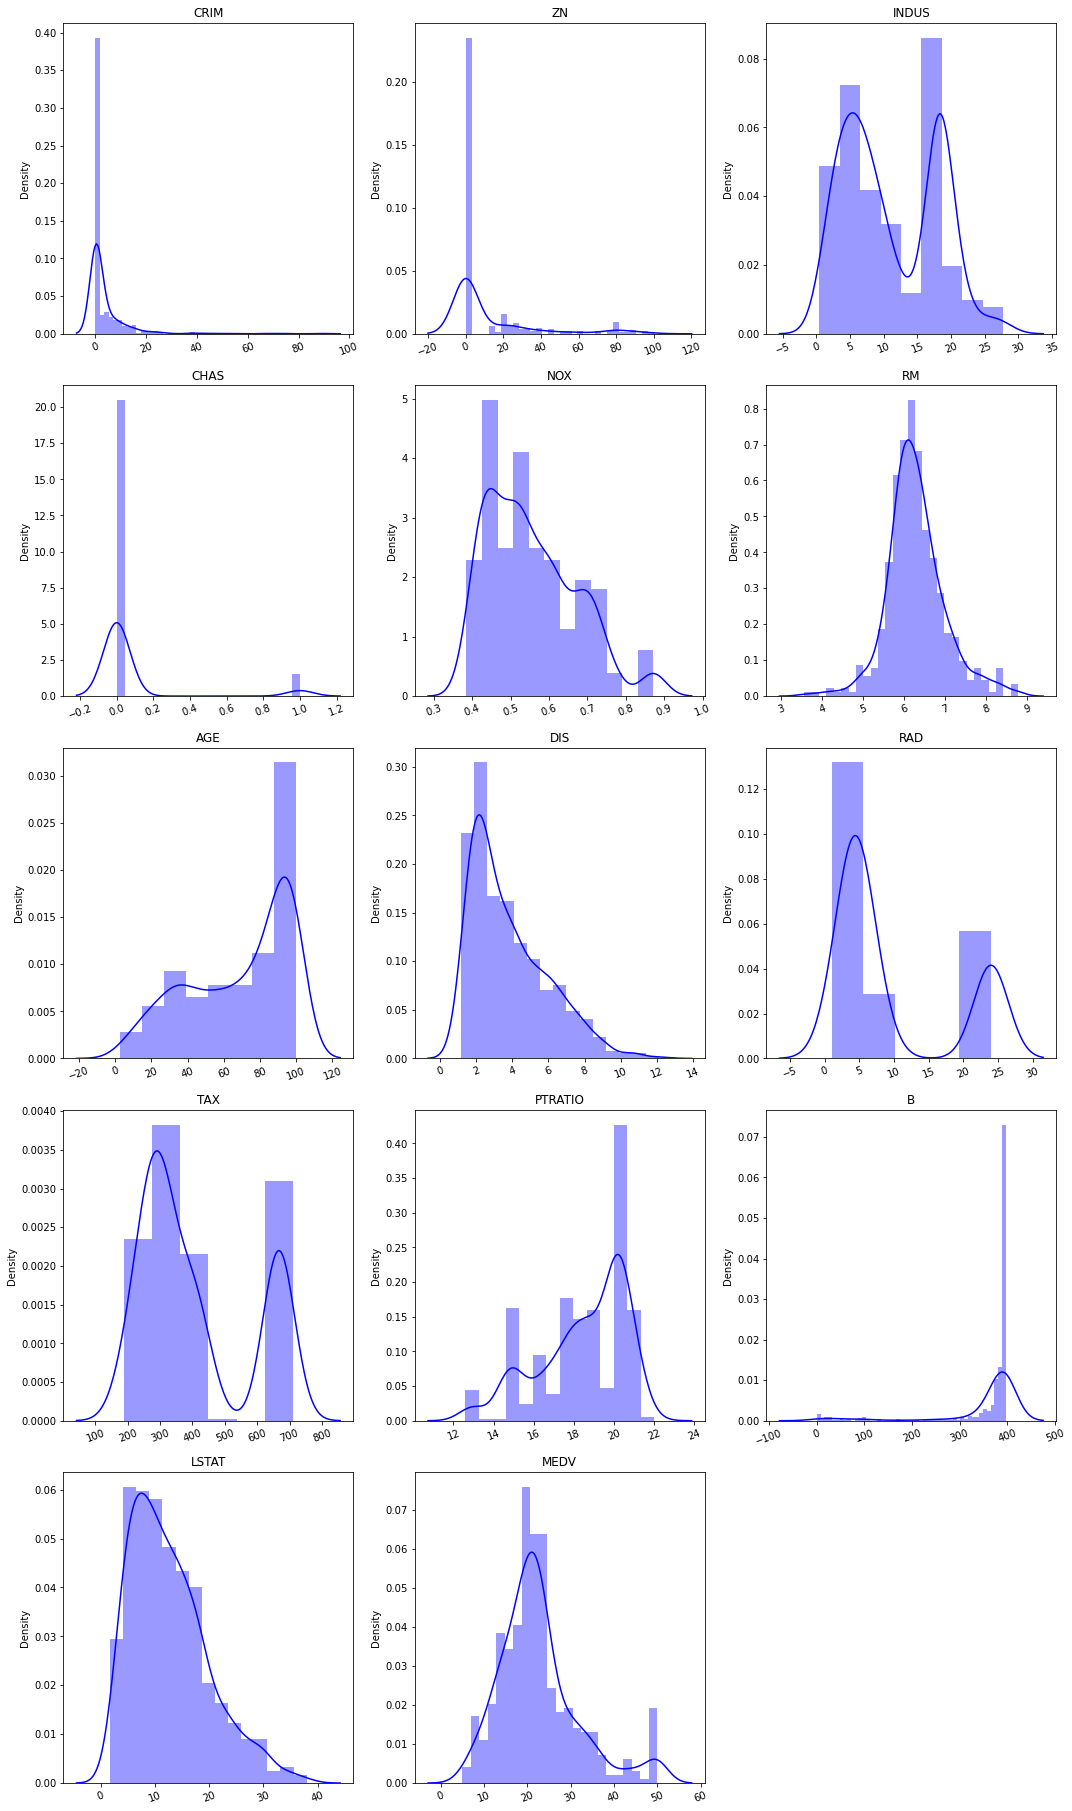

In [18]:
distribution_plot(df)

Observation
* `CRIM`    : Most of our data was around 0-20 and got high spike around 0, it means most of residental area are safe from criminal activity.
* `ZN`      : with high spike at 0 value, it indicate that most house in housing are below 25,000 squere feet, while residental area who have house above 25,000 squere feet generally have 20 and 80 houses.
* `Indus`   : with grow of industri in boston, there are common to have industri around resindental area, with number spike at 5 and 15 it means that most of housing have that number of industrial around them.
* `Chas`    : 93 % of housing tract don't bound to Charles river
* `Nox`     : Boston air Quality still have good despite grow of industri in boston, with standard california 3 pphm or 5,3 by National Ambient Air Quality Standard, Boston higest Nox was 0.82 with average of 0.55 pphm (https://ww2.arb.ca.gov/resources/nitrogen-dioxide-and-health)
* `Rm`      : most of average room of house in housing are 7-8 room
* `Age`     : most of resident are elderly with age around 80-100 with spike increase in number around 90-100. while younger generation have high population around age of 30-40
* `Dis`     : average housing in boston are made close to five employment center, with most of housing distance are 1-3 from five employment center
* `RAD`     : From graph there are some distance between value we can devide it into two type great and low access to highway, most of housing have low access to highway with score of 1-5, while other have great access are with score of 19-24
* `Tax`     : there are two area in graph, lets just say common Housing area are tax with average of 300, some elite area are have higher rate of tax with average of 660.
* `PTRatio` : the average ratio are quite good with teacher teaching aproximately 18-20 student make student get more individual attention, with highest score 22 it means 1 teacher teaching 22 student it still excelent balance.
* `B`       : The Black people tend to group in housing, this indicated with high density of black resident in 1 housing and not distribute around different number of total resident, althought there are still quite small black resident live in distribute around.
* `Lstat`   : boston has small number of lower level resident with median of 11,36% and max 37.97% of populance in housing.
* `Medv`    : most resident buy house around $20.000, while there are some of little spike at around $50.000 from other graph.
 

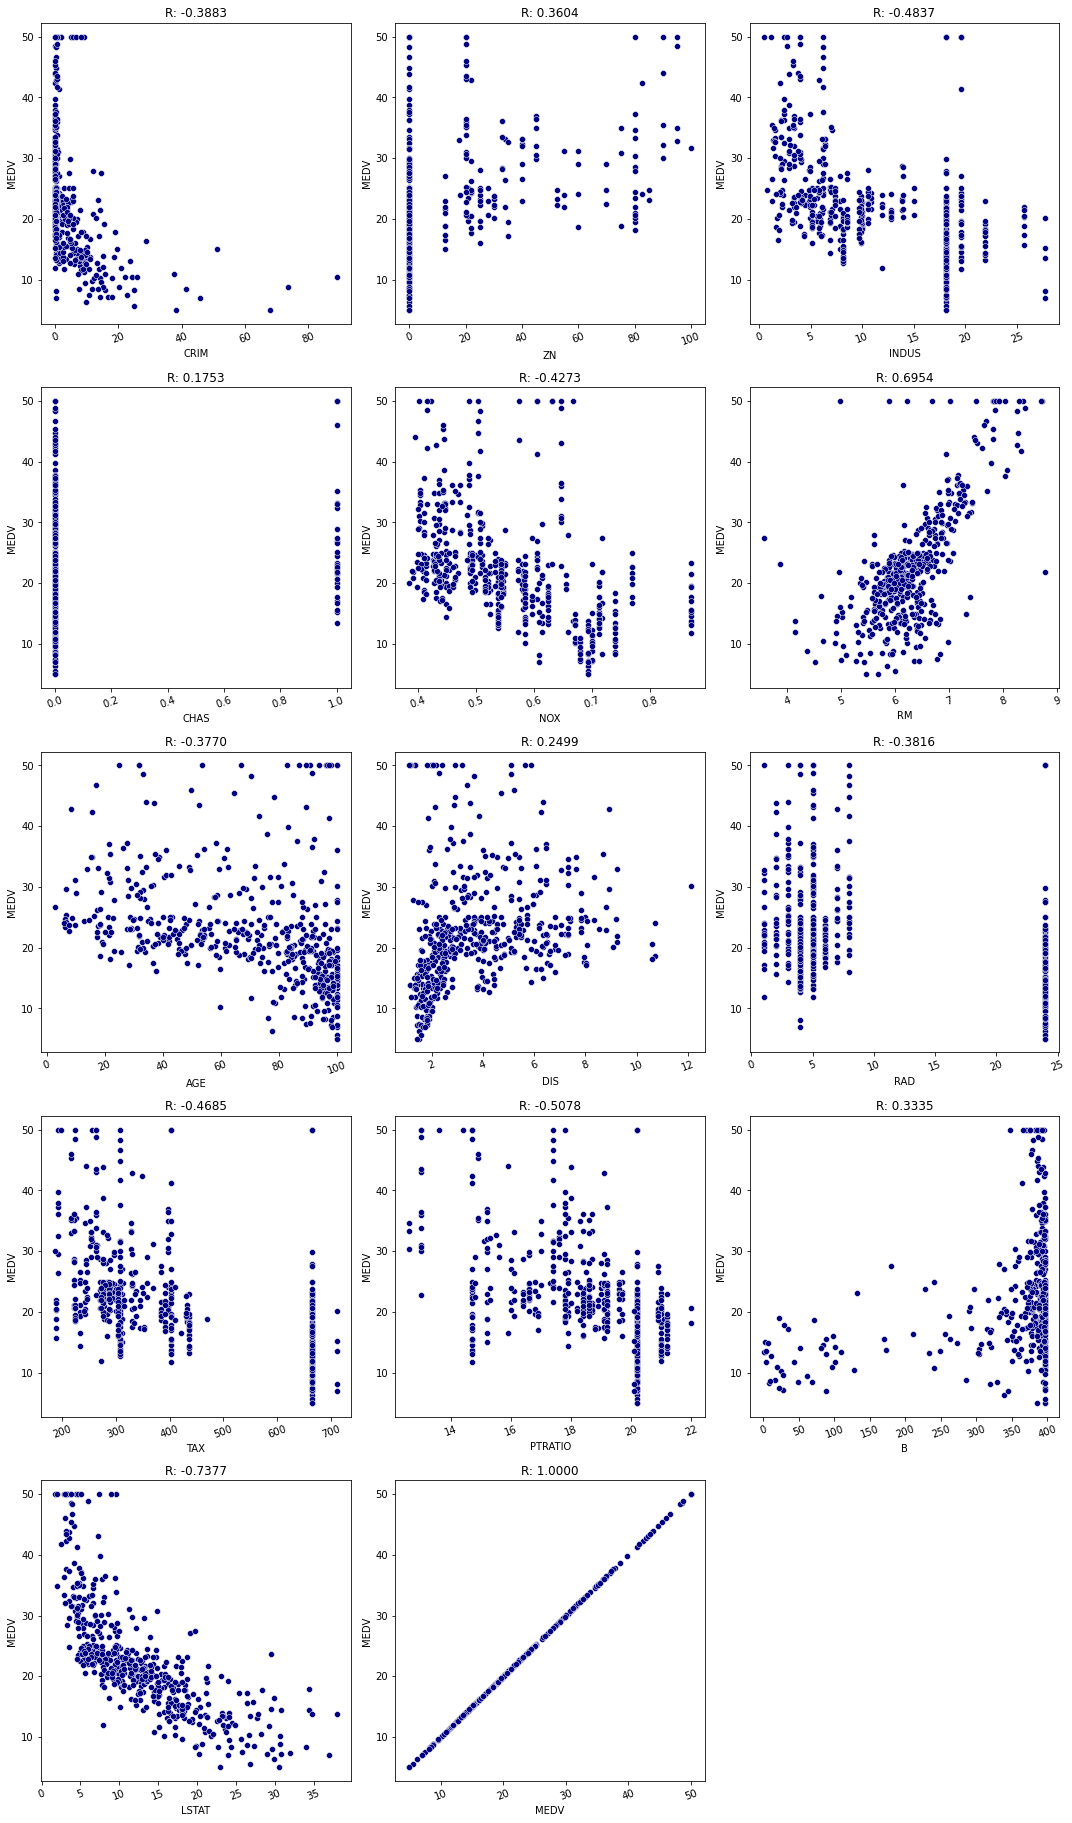

In [19]:
corr_scatterplot(df,'MEDV')

Observation:

* `RM` and `LSTAT` are the only columns that seem to have a high correlation with the response data. R scores are ~0.69, and ~-0.73, respectively. rm gives the average number of rooms. Increasing the house’s value as it gets more room does make sense. lstat is the percentage of lower status of the population. Interestingly, the value of the properties tend to go lower as we get higher larger population with lower economic status.

* Several variables display some irregularities and outliers in the data. For instance, most of the dots in `ZN` are in 0. zn is the proportion of residential land zoned for lots over 25,000 sq. ft. This could mean that many of the houses in the data are below 25,000 sq. ft., hence, their value in `ZN` is 0.

* Lastly, `CHAS` variables seem are categorical data. `CHAS` tells us if the houses are near the Charles River; 1 if tract bounds river, 0 otherwise. rad contains the indices of accessibility to radial highways. Larger index denotes better accessibility. Let’s look further into these variables latter.

## Multicollinearity

    feature  vif_score
1      CRIM   1.831537
2        ZN   2.352186
3     INDUS   3.992503
4      CHAS   1.095223
5       NOX   4.586920
6        RM   2.260374
7       AGE   3.100843
8       DIS   4.396007
9       RAD   7.808198
10      TAX   9.205542
11  PTRATIO   1.993016
12        B   1.381463
13    LSTAT   3.581585
14     MEDV   3.855684


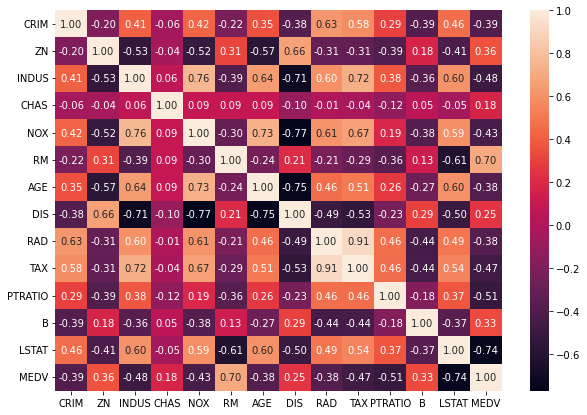

In [20]:
cek_multicollinearity(df,plot=True)

Observation:
* Tax have high vif score above 5 we will drop it latter
* Tax and Rad have high colleration, but between the two of them, tax corelates more to our target, so we will drop RAD latter.
 

## Outliner

Upper Fence: 9.06963875

Lower Fence: -5.31051125

Proportion of Upper Outliers: 13.043478260869565

Proportion of Lower Outliers: 0.0



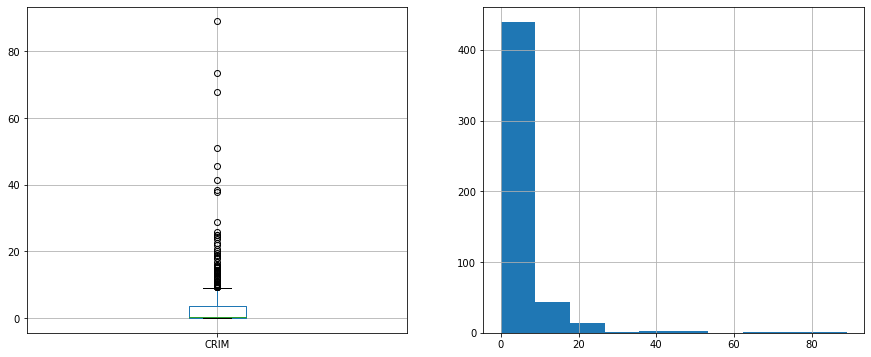

In [21]:
detect_outlier(df,'CRIM',plot = True)

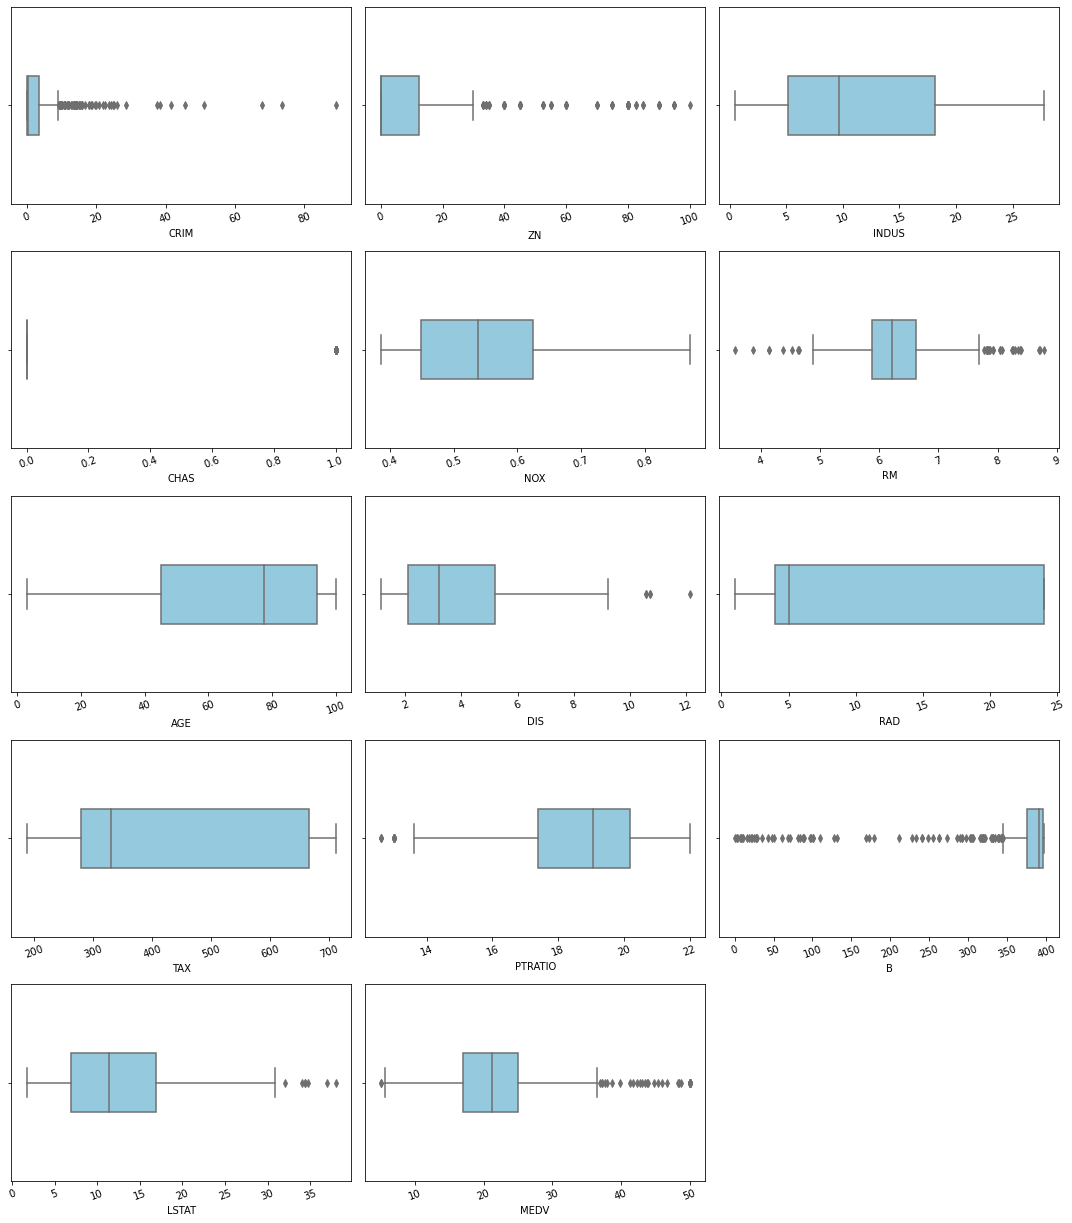

In [22]:
outlier_plot(df)

Upper Fence: 427.49625000000003

Lower Fence: 344.10624999999993

Proportion of Upper Outliers: 0.0

Proportion of Lower Outliers: 15.217391304347828



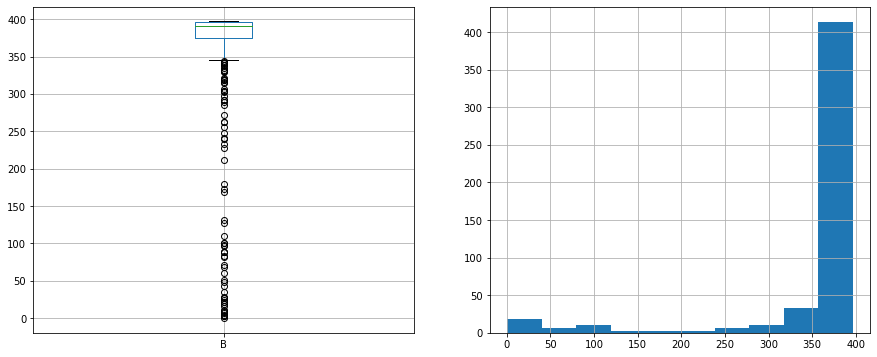

In [23]:
detect_outlier(df,'B',plot=True)

Observation:
* There are indication of outliner,but with EDA the housing behavior looks normal. medv higher because of the land size bigger, the black tend to grouping and housing who has more money make more rooms to their house.

## Deep Dive

what is the reason medv outliner / little spike at 45 to 50?

In [24]:
elite=df[df.MEDV>45]
elite

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
228,0.29819,0.0,6.20,0,0.5040,7.686,17.0,3.3751,8,307,17.4,377.51,3.92,46.7


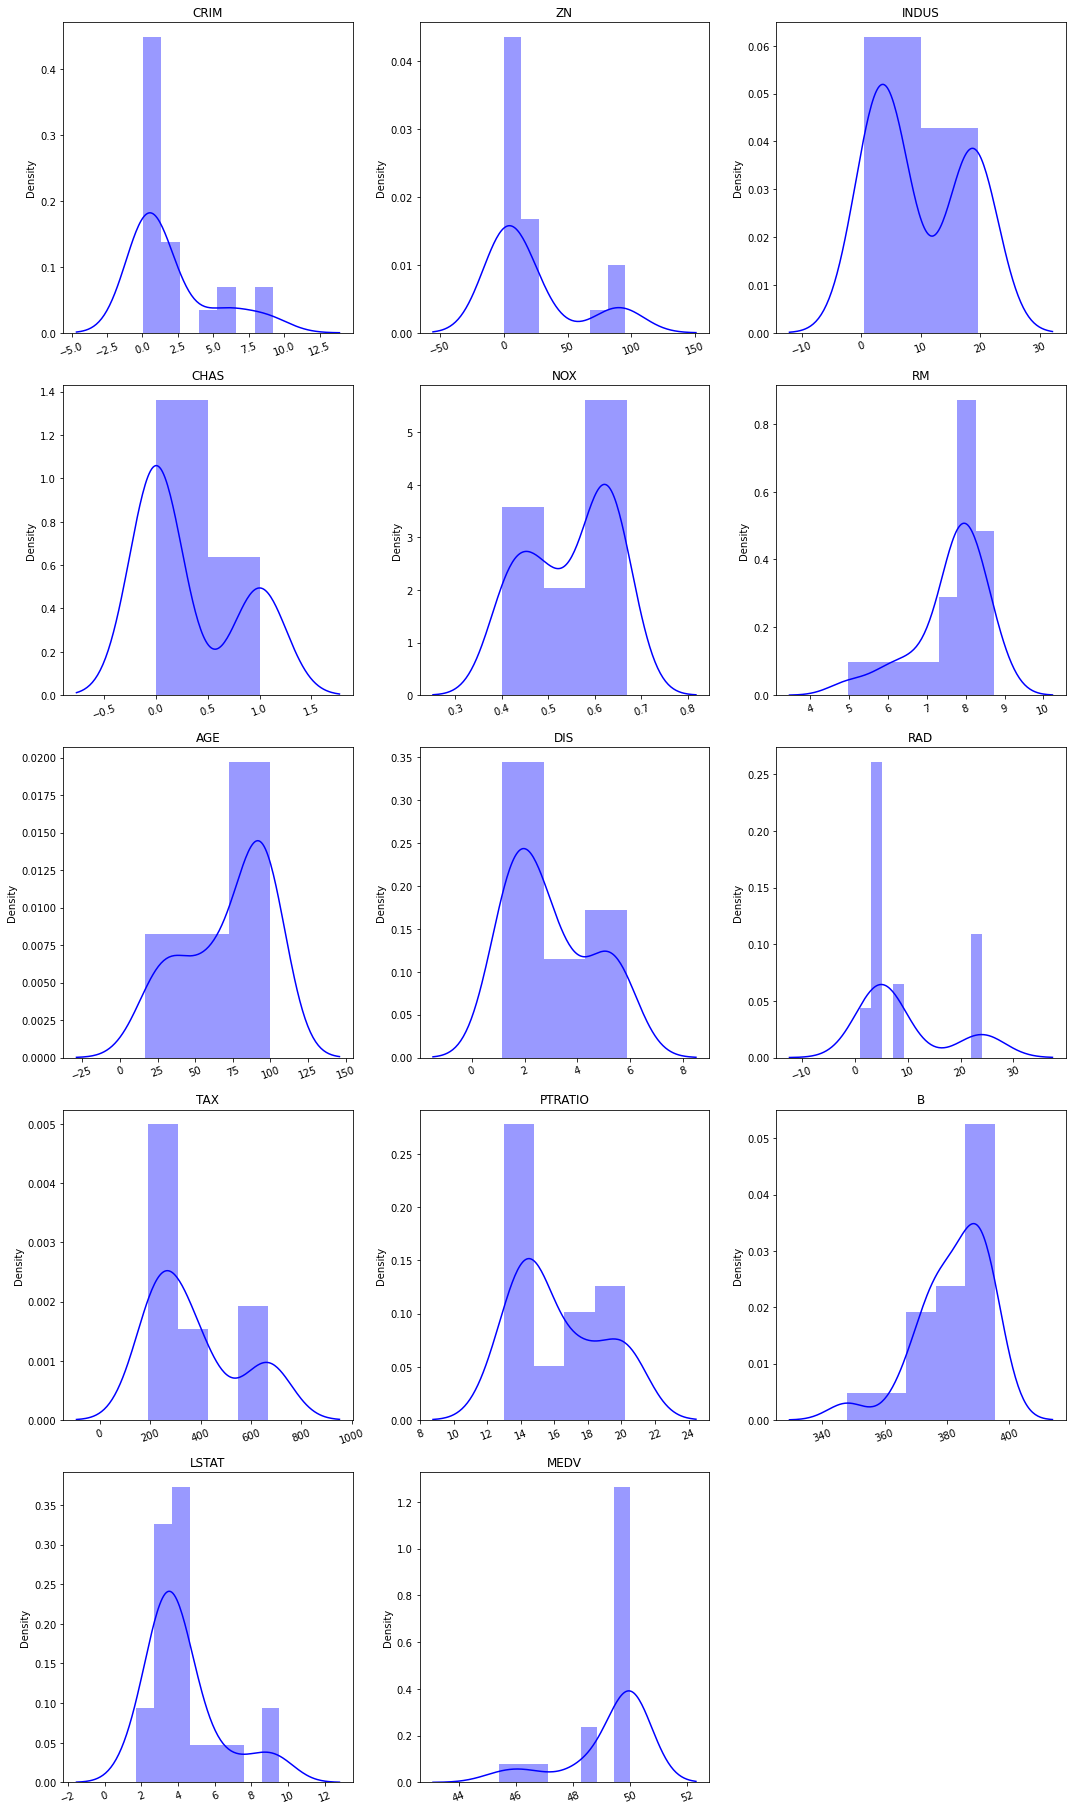

In [25]:
distribution_plot(elite)

Observation
* other than ZN and RM, the distribution behavior same as other housing.
* The increase of size of the land makes medv increase too, it just normal thing to have the bigger land you buy the higher the price is.
* With the increase of land medv resident tend to have more rooms in their house.

there are two group in zn, lets look what behavior they have

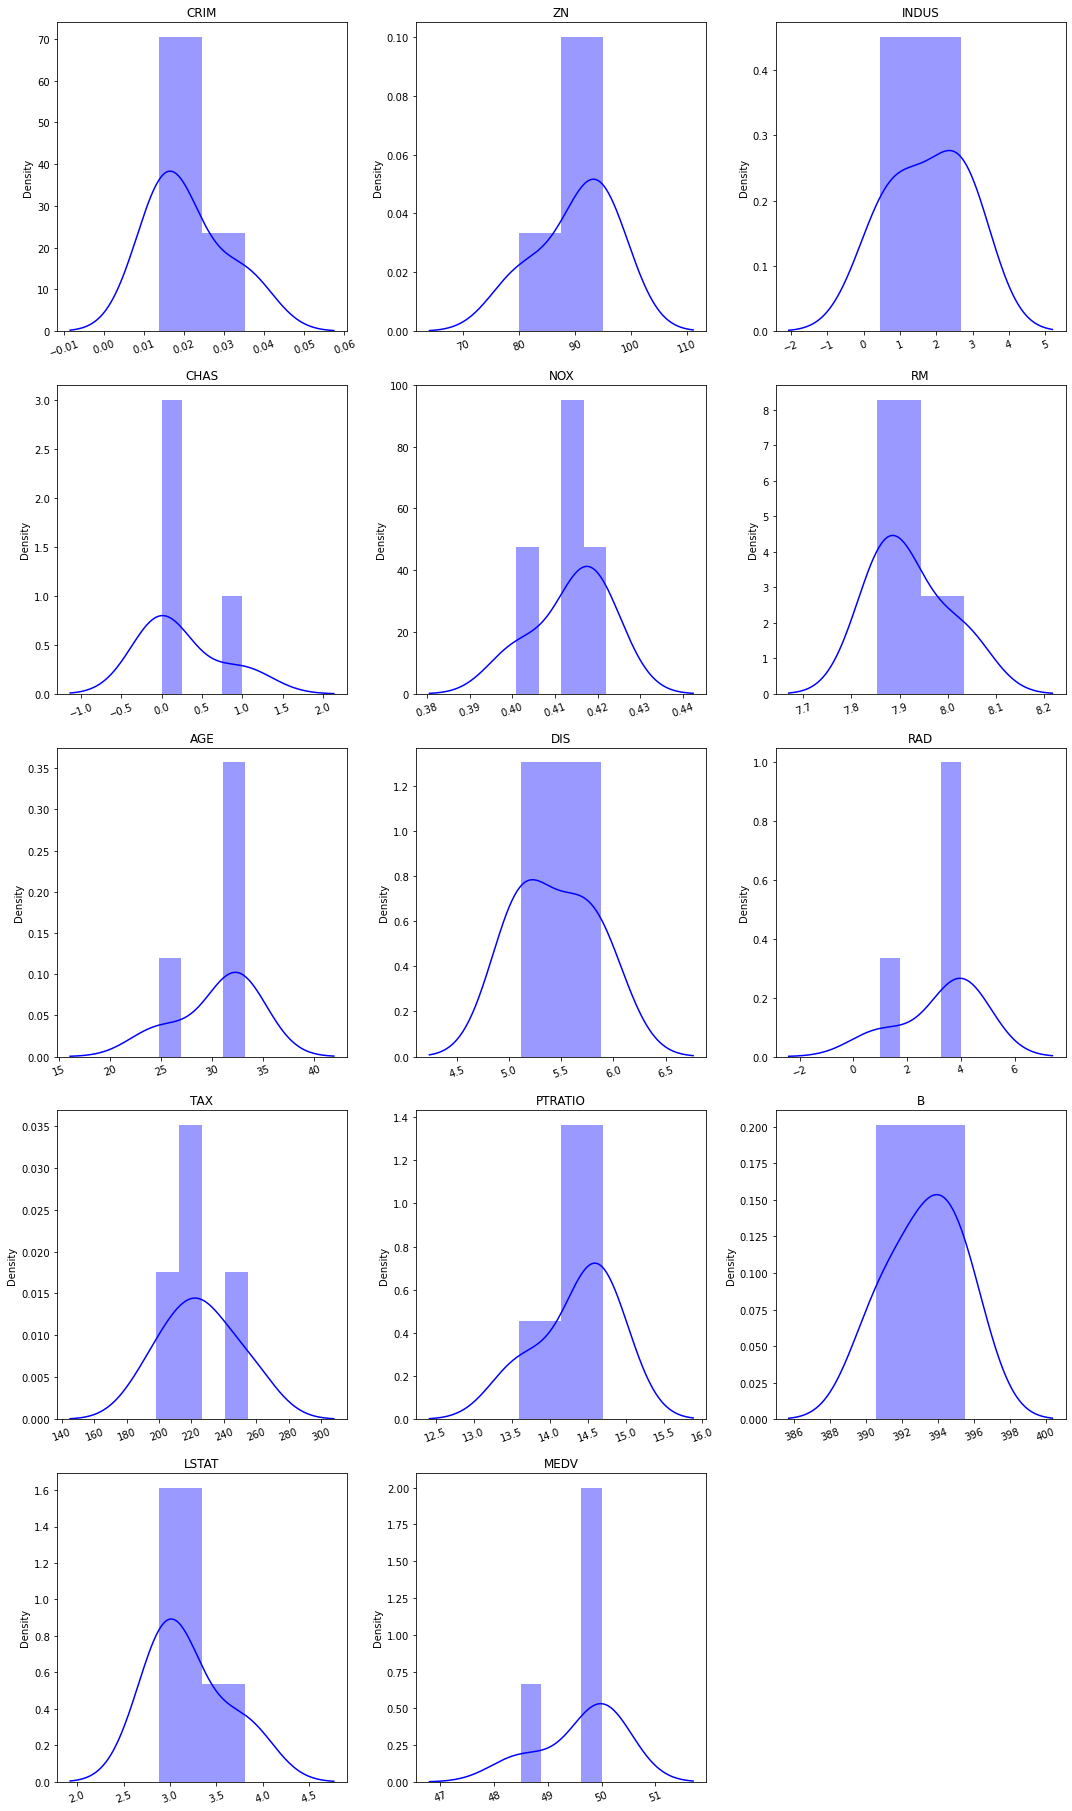

In [26]:
elite_upper_zn=elite[elite.ZN>50]
distribution_plot(elite_upper_zn)

Observation:
* This group of housing are really rich resident who buy huge land and have a lot rooms their house, medv are around 49 and 50
* The housing are build in really strategic place with medium access to highway, low tax, medium distance from 5 employment center, low crime rate, low industrial air polution.

What sort of behavior does medv have with CHAS and RAD?


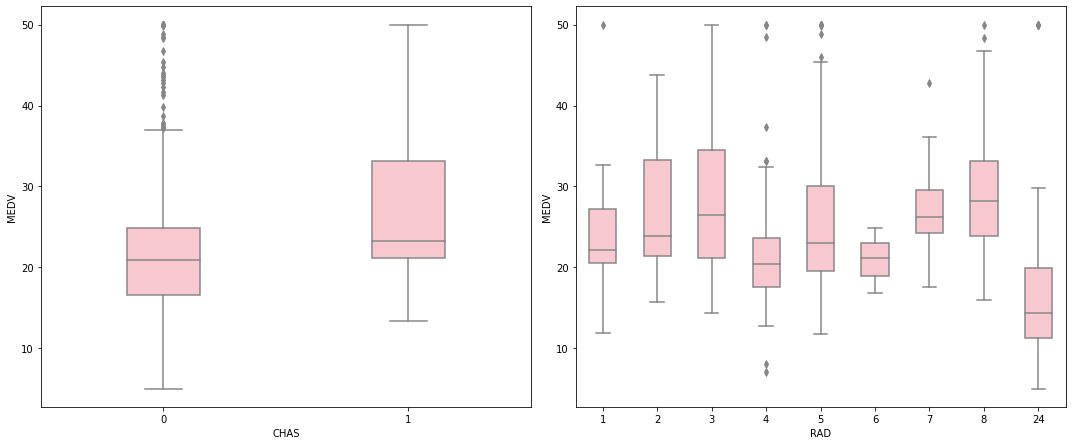

In [27]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.boxplot(data=df, y='MEDV',x='CHAS',width=0.3,color='pink')
plt.subplot(2,2,2)
sns.boxplot(data=df, y='MEDV',x='RAD',width=0.5,color='pink')
plt.tight_layout()

Observation:
* The bar on `chas`=1 is a little higher than `chas`=0. This means that many houseing near the Charles River are more expensive than those that are far from it. We can also see that there are several properties far from Charles River that are extremely higher than the usual values.
* In `rad` variable, we can see that the price ranges vary across different indices. Some look similar, but we can point out several groups that are really different from each other. As mentioned earlier, larger index denotes better accessibility. Index 24, interestingly, had the lowest range of prices although this is the largest index. it means that people dont need high accessiblity 3-8 accessiblity to housing is enough.

What the reason `RAD` on index 24 have the lowest `MEDV` range of price than others?

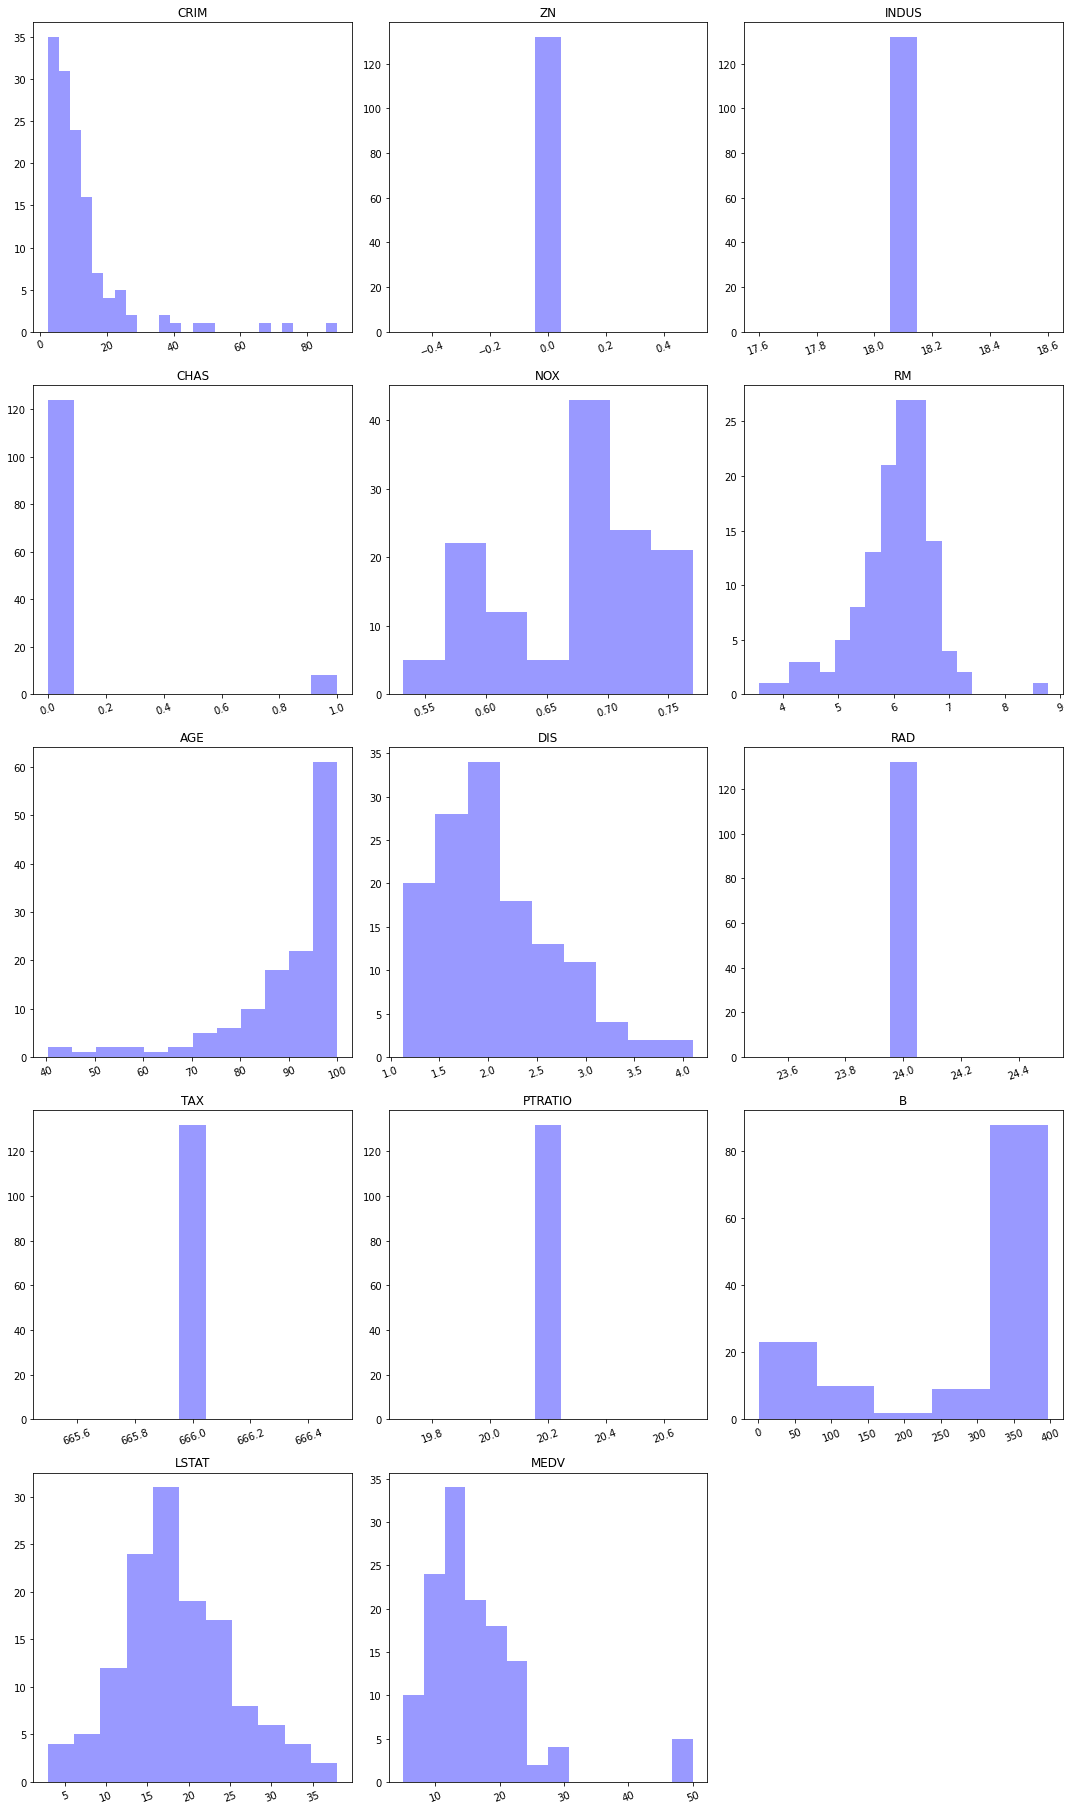

In [37]:
df_rad24=df[df.RAD==24]
distribution_plot(df_rad24,kde=False)

Observation
* all housing who have 24 score on `RAD` have 18.1 score on `INDUS `. It means the reason why the medv relatively lower even thought `RAD` is high because housing that have 24 score on `RAD` are build near a lot of industry. We can also see `TAX` have high score, it means tax in that housing area are more expensive than the other housing.

# Data Cleansing

There are no missing values. The outliner's behavior makes sense and looks normal. Multicolinearity handling will be applied in the next step in preprocessing.

**Because our data looks same as raw df so for the next step we will still using raw df**